# Homework 1

## EX1

Important points to pay attention to when submitting homework:
- submission must be in .pdf or html format
- avoid plagiarism
- include code
- try to answer all of the questions
- explain what you did
- visualize results
- form concise conclusions
- provide explanations for plots, graphs and tables if necessary
- submit in time
- make sure the correct file was sumbitted

## EX2 & EX3

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from time import perf_counter
from math import log2

#### 1) - Create a way to create generate inputs to an algorithm;

Specifying a seed removes variability from tests, guaranteeing same input

In [2]:
def generate_list(size, seed : int) -> list: 
    random.seed(seed)
    return [random.randint(-100,100) for _ in range(size)]

print(f"Generated an array of size 10: {generate_list(size=10, seed=42)}")

Generated an array of size 10: [63, -72, -94, 89, -30, -38, -43, -65, 88, -74]


#### 2) - Figure out how to time parts of code

Measure time right before running the method and right after method has finished

In [3]:
start = perf_counter()
generate_list(size=1_000_000, seed=42)
end = perf_counter()
print(f"Generating an array of size 1 000 000 took {end - start:0.4f} seconds")

Generating an array of size 1 000 000 took 0.3409 seconds


#### 3) - Measure time for given algorithm

Generate lists of increasing size, benchmark "calculate_odd_sum" 5 times on every input size (every time generating a new input list)

For benchmarking, I chose various input sizes between 10_000 and 10_000_000.<br>
For every iteration I generated a new list and the average of 5 results is takes for every input size.<br>
Calculating average time represents a more accurate result as the completion time can vary for the same input.<br>
It's important to generate a new list for every input. If the same input was used for multiple iterations then it's possible.<br>
that part of the completion would be stored in memory, which could significantly affect the result and therefore invalidate it.<br>
<br>
As can be seen from the plot, the complexity of the algorithm is linear, which can also be deduced from a glance at the algorithm's implementation.


In [4]:
def calculate_odd_sum(series: list) -> int:
    """
    Calculate sum of odd integers within the list
    """
    total_sum = 0
    for val in series:
        if val % 2 != 0:
            total_sum += val

    return total_sum

In [5]:
def measure_runtime(function : callable, input_size : list, iterations : int):
    """
    Measure the runtime of given function
    average result of number of X iterations with every given input
    """
    time_taken = []
    seed = 0
    for size in input_size:
        time = 0
        for _ in range(iterations):
            series = generate_list(size, seed)
            start = perf_counter()
            function(series)
            end = perf_counter()
            time += end - start
            seed =+ 1
        average_time = time / iterations
        time_taken.append(average_time)
    return input_size, time_taken

In [6]:
odd_sum_input = [10_000, 50_000, 100_000, 500_000, 1_000_000, 2_500_000, 5_000_000, 7_500_000, 10_000_000]
odd_sum_result = measure_runtime(calculate_odd_sum, input_size = odd_sum_input, iterations = 5)

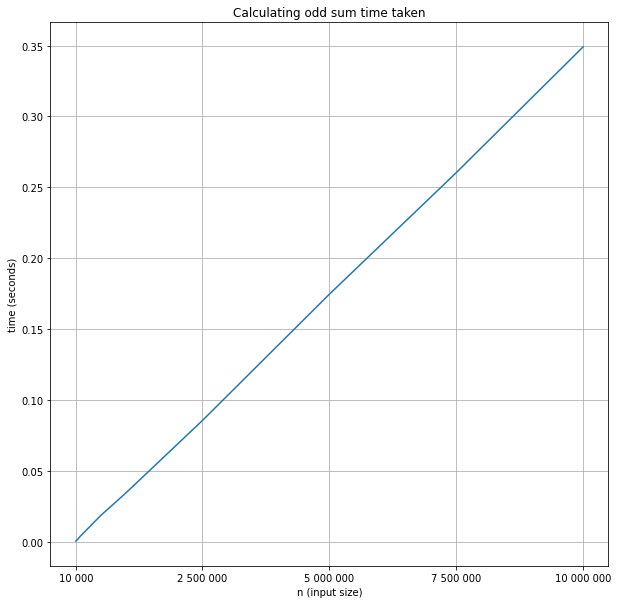

In [7]:
plt.subplots(figsize=(10, 10))
plt.xticks(ticks=[10_000, 2_500_000, 5_000_000, 7_500_000, 10_000_000], labels=[f"{x:_}".replace("_", " ") for x in [10_000, 2_500_000, 5_000_000, 7_500_000, 10_000_000]])
plt.plot(*odd_sum_result)
plt.grid()
plt.title('Calculating odd sum time taken')
plt.xlabel('n (input size)')
plt.ylabel('time (seconds)')
plt.show()

#### 4) - Analyse runtime variability

Benchmark "calculate_odd_sum" on input of size 500 000<br>
Test 500 different inputs, 3 tests per input

#### Does it take a different time to execute on the same input? Why? Write down some reasons, why does the algorithm take a different amount of time to execute on the same size input size?

It certainly does take different time. As can be seen from the plot, running the algorithm with the exact same input and with input of same size took varying time.<br>
There are a few outliers, but the overall completion time doesn't vary too much.<br>
There's no randomness in the algorthm. Algorithm is simple to understand and linear in complexity. Therefore, variability seems to come from how my computer manages resources while running the algorithm.<br>
One thing that could affect execution time is the sum being a very large positive or negative number at some pont.

In [8]:
def measure_variability(function : callable, array_size : int, iterations : int = 1) -> list:
    time_taken = []
    for seed in range(iterations):
        series = generate_list(array_size, seed)
        start = perf_counter()
        function(series)
        end = perf_counter()
        time_taken.append(end - start)
    return time_taken

In [9]:
odd_sum_variability_result1 = measure_variability(calculate_odd_sum, array_size=500_000, iterations=500)
odd_sum_variability_result2 = measure_variability(calculate_odd_sum, array_size=500_000, iterations=500)
odd_sum_variability_result3 = measure_variability(calculate_odd_sum, array_size=500_000, iterations=500)

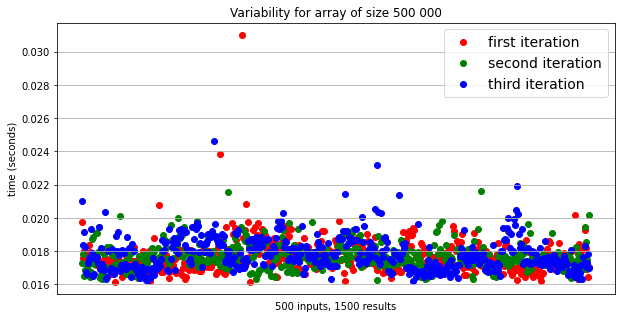

In [10]:
plt.subplots(figsize=(10, 5))
plt.scatter(x=np.arange(500), y=odd_sum_variability_result1, c="red")
plt.scatter(x=np.arange(500), y=odd_sum_variability_result2, c="green")
plt.scatter(x=np.arange(500), y=odd_sum_variability_result3, c="blue")
plt.legend(["first iteration", "second iteration", "third iteration"], prop={'size': 14})
plt.xticks(ticks=(x_ticks:=[]), labels=[])
plt.grid()
plt.title('Variability for array of size 500 000')
plt.xlabel('500 inputs, 1500 results')
plt.ylabel('time (seconds)')
plt.show()

Plot shows time taken to calculate sum of odd integers with an input of size 500 000.<br>
For every different value of x a new list was generated.<br>
Different iterations show variability with the exact same input.

#### 5) - Create plots    ✔️

## EX4

#### Measure a sorting algorithm that is part of your programming language's standard library. Briefly describe the algorithm and state its computational complexity
From python documentation and wikipedia I found that Python's builtin sorting algorithm uses TimSort.<br>
TimSort is a hybrid, stable sorting algorithm, derived from merge sort and insertion sort.<br>
The algorithm finds subsequences of the data that are already ordered (runs) and uses them to sort the remainder more efficiently. This is done by merging runs until certain criteria are fulfilled.<br>
<br>
Worst-case performance⠀⠀$O(n * log(n))$<br>
Best-case performance⠀⠀⠀$O(n)$<br>
Average performance⠀⠀⠀⠀$O(n * log(n))$<br>
Space complexity of⠀⠀⠀⠀⠀$n$<br>
<br>
Used sources: [docs.python.org/3/whatsnew/3.2.html](docs.python.org/3/whatsnew/3.2.html) and [en.wikipedia.org/wiki/Timsort](en.wikipedia.org/wiki/Timsort)

#### Try to overlay some function T(x) (relation between input array size and output time, e.g. T(x) = 2*x (seconds), where x is input list's length) that would approximate the built-in sort timings well. What T(x) did you choose and how?

The average performance for timsort is $O(n log(n))$<br>
Knowing that I created an approximation function were outer loop runs $\frac{5}{6} * n$ times and inner loop does $log(n)$ steps.<br>
Therefore creating an approximation function with similar time complexity to timsort.<br>
The multiplier $\frac{5}{6}$ I got from trying different values and seeing if it was similar on the plot with timsort.

In [11]:
timsort_input = [10_000, 500_000, 1_000_000, 2_000_000, 3_000_000, 4_000_000, 5_000_000]
timsort_result = measure_runtime(sorted, input_size = timsort_input, iterations = 5)

In [12]:
def approximation(input_size):
    time_taken = []
    iterations = 5
    for input in input_size:
        time = 0
        for _ in range(iterations):
            start = perf_counter()
            # complexity of n log n
            for i in range(int(input / 1.2)): #outer loop
                for j in range(1, input): # inner loop
                    j = j*2
                    if j < input:
                        break
            end = perf_counter()
            time += end - start
        average_time = time / iterations
        time_taken.append(average_time)
    return input_size, time_taken

approximation_result = approximation(timsort_input)

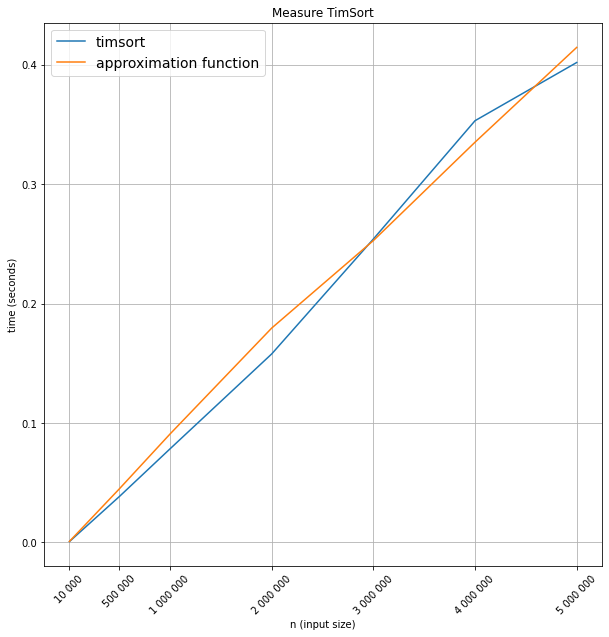

In [13]:
plt.subplots(figsize=(10, 10))
plt.xticks(ticks=timsort_input, labels=[f"{x:_}".replace("_", " ") for x in timsort_input])
plt.plot(*timsort_result)
plt.plot(*approximation_result)
plt.plot()
plt.legend(["timsort", "approximation function"], prop={'size': 14})
plt.grid()
plt.xticks(rotation = 45)
plt.title('Measure TimSort')
plt.xlabel('n (input size)')
plt.ylabel('time (seconds)')
plt.show()

#### Try to measure how many integers (N) can your system roughly sort in 1 minute

Using an input of integers from 1 to N, my system can calculate approximately N = 3_800_000 in one second.<br>
<br>
#### Predict what would be the sorting time be if you increase N 100 or 1000 times.

Values 10 and 100 times smaller than N = 3_800_000 were an average of 14 times faster<br>
Therefore for N 100 times larger than N = 3_800_000 it would take at least 1 second * $14^2$ = 196 seconds = 3 minutes 16 seconds.<br>
And for N 1000 times larger than N = 3_800_000 it would take at least 1 second * $14^3$ = 2744 seconds = 45 minutes 44 seconds.<br>
<br>
It's not a precise prediction, because with time complexity of $n * log(n)$,<br>
increasing the size of N by 10 will increase time taken by a larger amount for larger N and smaller amount for smaller N.

In [14]:
def measure_timsort_variability(function : callable, array_size : int, iterations : int = 1) -> list:
    time_taken = []
    for seed in range(iterations):
        random.seed(seed)
        series = [i for i in range(array_size)]
        random.shuffle(series)
        start = perf_counter()
        function(series)
        end = perf_counter()
        time_taken.append(end - start)
    return time_taken

In [15]:
print("Average time for input of size 38_000: ", avg0:=np.average(measure_timsort_variability(sorted, array_size = 3_800, iterations=5)))
print("Average time for input of size 38_000: ", avg1:=np.average(measure_timsort_variability(sorted, array_size = 38_000, iterations=5)), "increase by a factor of", avg1 / avg0)
print("Average time for input of size 380_000: ",avg2:=np.average(measure_timsort_variability(sorted, array_size = 380_000, iterations=5)), "increase by a factor of", avg2 / avg1)
print("Average time for input of size 3_800_000: ",avg3:=np.average(measure_timsort_variability(sorted, array_size = 3_800_000, iterations=5)), "increase by a factor of", avg3 / avg2)

Average time for input of size 38_000:  0.00028541999927256256
Average time for input of size 38_000:  0.00428306000030716 increase by a factor of 15.006166390663608
Average time for input of size 380_000:  0.05458915999988676 increase by a factor of 12.745364294679948
Average time for input of size 3_800_000:  0.992526879999059 increase by a factor of 18.181757696969836


## EX5

$\lim_{x \to \infty} \frac{f(x)}{g(x)} = \lim_{x \to \infty}  \frac{3 * x^4 + x}{x^4 + x^2} = \lim_{x \to \infty}  \frac{3 + \frac{1}{x^2} }{1 + \frac{1}{x^2}} = \frac{3 + 0}{1+ 0} = 3$<br>
<br>
$0 < \lim_{x \to \infty} \frac{f(x)}{g(x)} < \infty$ , therefore $ f(n) = \Theta(g(n)) $<br>
<br>
Let $f : N -> R^+$ and $g : N -> R^+$ be two functions from the natrual numbers to the non-negative reals<br>
Let's pick $c_1 = 0.1$, $c_2 = 10$ and $n_0 = 1$.<br>
<br>
$f(n) = 3 * n^4 + n$<br>
$g(n) = n^4 + n^2$<br>
<br>
for all $n$ > $n_0$ it holds:<br>
$f(n) ≥ c_1 * g(n)$ and $f(n) ≤ c_2 * g(n)$<br>
<br>
It can be seen from the plot that $f(n)$ is sandwiched by $c_1*g(n)$ and $c_2*g(n)$ after $n_0$.

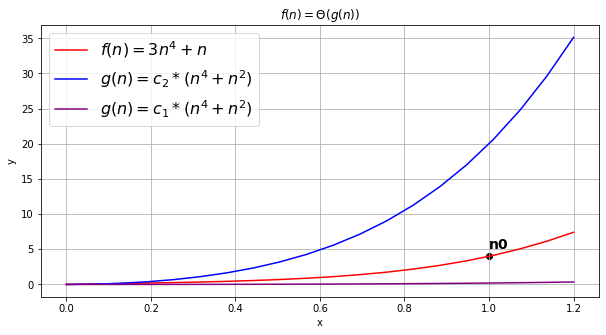

In [16]:
def f(n): return 3 * n**4 + n
def g(n): return n**4 + n**2

c1 = 0.1
c2 = 10
n0 = (1, f(1))

plt.subplots(figsize=(10, 5))
x = np.linspace(0, 1.2, 20)
plt.plot(x, f(x), "red")
plt.plot(x, c2 * g(x), "blue")
plt.plot(x, c1 * g(x), "purple")
plt.legend(["$f(n) = 3n^4 + n$", "$g(n) = c_2 * (n^4 + n^2)$", "$g(n) = c_1 * (n^4 + n^2)$"], prop={'size': 16})

plt.scatter(*n0, c="black")
plt.annotate("n0", (n0[0], n0[1]+1), weight='bold', size=14)

plt.grid()
plt.title('$f(n) = \Theta(g(n))$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## EX6

Make an inefficient randomized sorting algorithm that permutes the input and tests if it is sorted.<br>
Keep permuting until one of the random permutations is sorted.

In [17]:
def permutation_sort(array : list) -> list:
    """
    Permutes the input until it's sorted
    """
    copy = array.copy()
    size = len(copy)
    while True:
        random.shuffle(copy)
        for i in range(1, size):
            if copy[i - 1] > copy[i]:
                break
        else:
            return copy

array = []
for i in range(11):
    array.append(i)
    start = perf_counter()
    for _ in range(5):
        permutation_sort(array)
    end = perf_counter()
    print(f"Input of size {len(array)} took {(end - start) / 5} seconds")

Input of size 1 took 1.219999830937013e-06 seconds
Input of size 2 took 3.3999996958300473e-06 seconds
Input of size 3 took 4.759999865200371e-06 seconds
Input of size 4 took 2.376000047661364e-05 seconds
Input of size 5 took 0.00022402000031433998 seconds
Input of size 6 took 0.0011760400004277472 seconds
Input of size 7 took 0.003681059999507852 seconds
Input of size 8 took 0.04959031999969739 seconds
Input of size 9 took 0.442692679999891 seconds
Input of size 10 took 6.308497680000437 seconds
Input of size 11 took 104.15157648000022 seconds


#### For how large N it is already infeasible to test all permutations on your laptop?
It already takes over a minute (average of 5 results) to sort an array of size 11 . Anyone can see how inefficient just permutating the input is.<br>
Calculating N = 13 seems feasible, but could take hours. Although, that would easily fit in the time frame of homework.<br>
Therefore, N = 15 would definitely be infeasible, because it could take weeks.<br>
<br>
#### How to create one random permutation of N values (i.e. how to scramble fully the ordered input)?
One option would be to go through the list and swap random elements every step.<br>
Another way would be to remove elements from a list and add them at the end of a new array, stopping when the original list is empty.<br>
Another inefficient way would be to create a list containing all different ways of arranging N values and randomly pick one of them.<br>
<br>
For all three methods, the result is a random permutation.

## EX7

##### 7.1. Which library is faster, according to the "Big-O" notation?

Let $f : N -> R^+$ and $g : N -> R^+$ be two functions from the natrual numbers to the non-negative reals<br>
Let's pick $c = 1$ and $n_0 = 110 000$.<br>
<br>
$f(n) = 0.3 * n * log(n)$<br>
$g(n) = log(n) + 5 * n$<br>
<br>
for all $n > n_0$ it holds $f(n) > c * g(n)$, therefore $f(n)= \Omega(g(n))$<br>

Conclusion: Library B is faster than library A

##### 7.2 Find out in which conditions the two libraries outperform each other. Use plots to show your findings.
I made two plots for inputs ranging from 5000 to 100_000 and from 100_000 to 1_000_000, comparing libraries A and B.<br>
As can be seen from the plots, library B starts to outperform library A at around input size of 100 000.

In [18]:
def library_a(x: int):
    return 0.3 * x * log2(x)

def library_b(x : int):
    return log2(x) + 5 * x

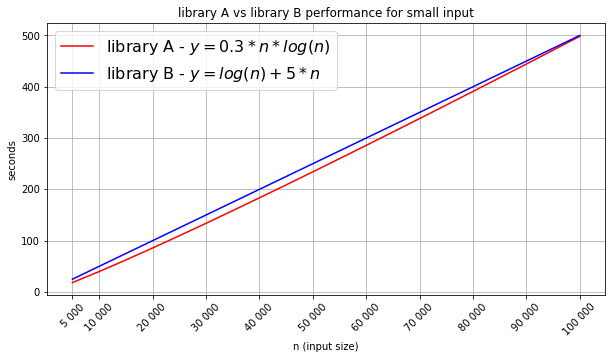

In [19]:
plt.subplots(figsize=(10, 5))
small_input = [5000 * i for i in range(1, 21)]
plt.plot(small_input, [library_a(data) / 1000 for data in small_input], "red")
plt.plot(small_input, [library_b(data) / 1000 for data in small_input], "blue")
plt.xticks(ticks=[5000] + small_input[1::2], labels=[f"{x:_}".replace("_", " ") for x in [5000] + small_input[1::2]])
plt.xticks(rotation = 45)
plt.legend(["library A - $y = 0.3 * n * log(n)$", "library B - $y = log(n) + 5 * n$"], prop={'size': 16})
plt.grid()
plt.title('library A vs library B performance for small input')
plt.xlabel('n (input size)')
plt.ylabel('seconds')
plt.show()

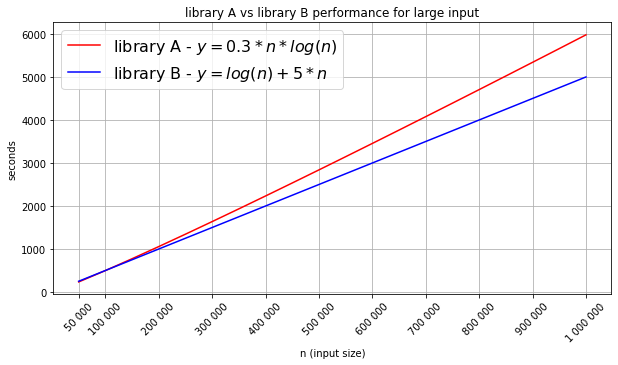

In [20]:
plt.subplots(figsize=(10, 5))
large_input = [50_000 * i for i in range(1, 21)]
plt.plot(large_input, [library_a(data) / 1000 for data in large_input], "red")
plt.plot(large_input, [library_b(data) / 1000 for data in large_input], "blue")
plt.xticks(ticks=[50_000] + large_input[1::2], labels=[f"{x:_}".replace("_", " ") for x in [50_000] + large_input[1::2]])
plt.xticks(rotation = 45)
plt.legend(["library A - $y = 0.3 * n * log(n)$", "library B - $ y =log(n) + 5 * n$"], prop={'size': 16})

plt.grid()
plt.title('library A vs library B performance for large input')
plt.xlabel('n (input size)')
plt.ylabel('seconds')
plt.show()

#### 7.3. Finally, given the initial circumstances, choose the best library for the company to use.

As long as the input size stays below 50 000, it's recommended to use libray A.<br>
However, when size of data starts to scale, it's highly recommended to use library A instead.<br>
At current data size, library B is on average 15% slower than library A. However, since the size of input is small the difference is only a few seconds.<br>
So, depending on how difficult these two libraries are to integrate, it might be better to use library A from the start, because the performance gain later on will be much more noticeable.


In [21]:
avg1, min1, max1 = np.mean(a1 :=[library_b(1000 * i) / library_a(1000 * i) * 100 for i in range(5, 51)]), min(a1), max(a1) # 5000 - 50_000
avg2, min2, max2  = np.mean(a2 :=[library_b(1000 * i) / library_a(1000 * i) * 100 for i in range(50, 101)]), min(a2), max(a2)  # 50_000 - 100_000
avg3, min3, max3  = np.mean(a3 :=[library_b(10_000 * i) / library_a(10_000 * i) * 100 for i in range(10, 51)]), min(a3), max(a3)  # 100_000 - 500_000
avg4, min4, max4  = np.mean(a4 :=[library_b(10_000 * i) / library_a(10_000 * i) * 100 for i in range(50, 101)]), min(a4), max(a4)  # 500_000 - 1_000_000

print(f"Library A is on average {avg1:.2f}%  as efficient as Library B for input size 1_000 to 50_000,      from  {abs(min1-100):.2f}%  to {abs(max1-100):.2f}%  decrease")
print(f"Library A is on average {avg2:.2f}%  as efficient as Library B for input size 50_000 to 100_000,    from  {abs(min2-100):.2f}%  to  {abs(max2-100):.2f}%  decrease")
print(f"Library A is on average {avg3:.2f}% as efficient as Library B for input size 100_000 to 500_000,   from  {abs(max3-100):.2f}%  to  {abs(min3-100):.2f}% increase")
print(f"Library A is on average {avg4:.2f}% as efficient as Library B for input size 100_000 to 1_000_000, from  {abs(max4-100):.2f}% to  {abs(min4-100):.2f}% increase")

Library A is on average 115.23%  as efficient as Library B for input size 1_000 to 50_000,      from  6.78%  to 35.70%  decrease
Library A is on average 103.14%  as efficient as Library B for input size 50_000 to 100_000,    from  0.35%  to  6.78%  decrease
Library A is on average 92.40% as efficient as Library B for input size 100_000 to 500_000,   from  0.35%  to  11.96% increase
Library A is on average 85.54% as efficient as Library B for input size 100_000 to 1_000_000, from  11.96% to  16.38% increase
